# CAPSTONE PROJECT MODUL 2

#### IMPORT MODUL

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns', None)

## Superstore Cohort Retention Analysis

### Background Context
Perusahaan Superstore tidak hanya perlu memperoleh pelanggan baru, tetapi juga mempertahankan pelanggan lama agar terus bertransaksi.

Melalui cohort retention analysis, perusahaan dapat memahami perubahan loyalitas pelanggan dari waktu ke waktu, sekaligus membandingkan retensi dengan kinerja sales dan profit pada berbagai segmen, wilayah, dan kategori produk. Insight ini menjadi dasar penting dalam merumuskan strategi bisnis dan peningkatan retensi pelanggan yang lebih tepat sasaran.

### Stakeholders
**Business Intelligence / Data Analyst Team**

Bertanggung jawab mengolah data transaksi, menganalisis retensi, sales, dan profit, serta menyajikan insight dalam bentuk visualisasi yang mendukung keputusan bisnis.


### Problem Statement

* Retensi pelanggan per semester perlu dianalisis untuk tiap kategori produk (Furniture, Office Supplies, Technology).

* Perlu diketahui perbedaan retensi antar segmen pelanggan (Consumer, Corporate, Home Office).

* Perbandingan retensi, sales, dan profit antar kategori dan segmen akan menjadi dasar dalam menentukan strategi bisnis ke depan yang sesuai dengan kondisi masing-masing kategori dan segmen.

### GOAL

* Menganalisis pola pembelian pelanggan berdasarkan kategori produk dan segmen pelanggan.

* Membandingkan retensi pelanggan untuk melihat pola rutin, musiman, dan jangka panjang.

* Mengkaji perbedaan sales, profit, dan retensi tiap kategori dan segmen untuk menjadi landasan penyusunan strategi bisnis yang lebih tepat sasaran ke depan.






### Dataset Overview
Dataset yang digunakan adalah Superstore Dataset, berisi catatan transaksi penjualan retail di berbagai wilayah. Data ini mencakup informasi pelanggan, produk, penjualan, serta pengiriman.

#### Daftar Kolom dalam Dataset
1. Order ID → kode unik untuk setiap pesanan.

2. Order Date → tanggal pesanan dibuat.

3. Ship Date → tanggal pesanan dikirim.

4. Ship Mode → metode pengiriman (Same Day, First Class, Second Class, Standard Class).

5. Customer ID → kode unik pelanggan.

6. Customer Name → nama pelanggan.

7. Segment → kategori pelanggan (Consumer, Corporate, Home Office).

8. Country → negara pelanggan (di dataset ini: Amerika Serikat).

9. City → kota pelanggan.

10. State → provinsi/negara bagian pelanggan.

11. Postal Code → kode pos pelanggan.

12. Region → wilayah penjualan (Central, East, South, West).

13. Product ID → kode unik produk.

14. Category → kategori produk (Furniture, Office Supplies, Technology).

15. Sub-Category → sub-kategori produk (Chair, Binder, Phone, dll.).

16. Product Name → nama produk.

17. Sales → nilai penjualan (USD).

18. Quantity → jumlah unit produk yang dibeli.

19. Discount → diskon yang diberikan.

20. Profit → keuntungan bersih (USD).

#### Informasi Awal Dataset / Membaca Dataset Superstore



In [2]:
# Membaca file CSV dengan encoding latin1 (karena ada karakter non-UTF-8)
df = pd.read_csv('Superstore.csv', encoding='latin1')
display(df.head(), df.info()) # Melihat 5 baris pertama untuk memastikan data terbaca dengan benar & informasi ringkas dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


None

In [3]:
# Pastikan kolom Order Date & Ship Date menjadi datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=False, errors='coerce')
df['Ship Date']  = pd.to_datetime(df['Ship Date'], errors='coerce')

# Cek ulang periode
print("Order Date (min):", df['Order Date'].min())
print("Order Date (max):", df['Order Date'].max())

Order Date (min): 2014-01-03 00:00:00
Order Date (max): 2017-12-30 00:00:00


In [4]:
# Jumlah unique values
print("Jumlah unik entitas penting:")
print("Customers         :", df['Customer ID'].nunique())
print("\nSegments          :", df['Segment'].nunique(), "-", df['Segment'].unique())
print("\nCategory Product  :", df['Category'].nunique(), "-", df['Category'].unique())
print("\nCountry           :", df['Country'].nunique(), "-", df['Country'].unique())
print("\nRegions           :", df['Region'].nunique(), "-", df['Region'].unique())
print("\nState             :", df['State'].nunique(), "-", df['State'].unique())
print("\nCity              :", df['City'].nunique(), "-", df['City'].unique())

Jumlah unik entitas penting:
Customers         : 793

Segments          : 3 - ['Consumer' 'Corporate' 'Home Office']

Category Product  : 3 - ['Furniture' 'Office Supplies' 'Technology']

Country           : 1 - ['United States']

Regions           : 4 - ['South' 'West' 'Central' 'East']

State             : 49 - ['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' 'Texas'
 'Wisconsin' 'Utah' 'Nebraska' 'Pennsylvania' 'Illinois' 'Minnesota'
 'Michigan' 'Delaware' 'Indiana' 'New York' 'Arizona' 'Virginia'
 'Tennessee' 'Alabama' 'South Carolina' 'Oregon' 'Colorado' 'Iowa' 'Ohio'
 'Missouri' 'Oklahoma' 'New Mexico' 'Louisiana' 'Connecticut' 'New Jersey'
 'Massachusetts' 'Georgia' 'Nevada' 'Rhode Island' 'Mississippi'
 'Arkansas' 'Montana' 'New Hampshire' 'Maryland' 'District of Columbia'
 'Kansas' 'Vermont' 'Maine' 'South Dakota' 'Idaho' 'North Dakota'
 'Wyoming' 'West Virginia']

City              : 531 - ['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort

## Pre-Processing Data

In [5]:
# === 1. Cek Missing Values ===
print("Jumlah missing values tiap kolom:")
df.isnull().sum()

Jumlah missing values tiap kolom:


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [ ]:
# === 2. Cek Duplikat ===
print("\nJumlah duplikat baris:", df.duplicated().sum())


Jumlah duplikat baris: 0


In [7]:
# === 3. Cek Tipe Data ===
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

## Exploratory Data Analysis

### Jumlah Transaksi per Quarter & Half Year (2014–2017)

Untuk memahami pola penjualan sebelum analisis cohort, kita bisa melihat distribusi jumlah transaksi per kuartal dari tahun ke tahun.

Q1 = Januari–Maret

Q2 = April–Juni

Q3 = Juli–September

Q4 = Oktober–Desember

---------------------

H1 = Januari-Juni

H2 = Juli-Desember

Visualisasi ini membantu melihat tren per periode dalam data Superstore.

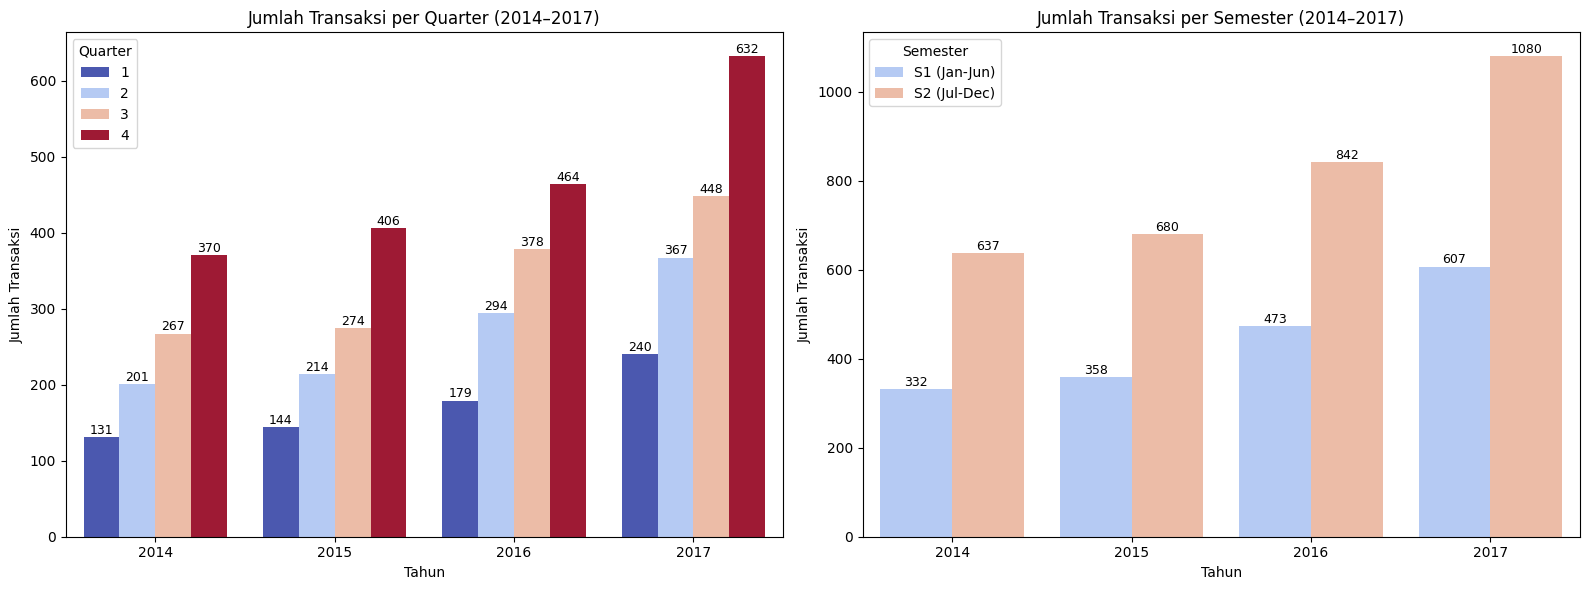

In [24]:
# Pastikan kolom tanggal sudah datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Tambahkan kolom Year, Quarter, dan Semester
df['Year'] = df['Order Date'].dt.year
df['Quarter'] = df['Order Date'].dt.quarter
df['Semester'] = np.where(df['Order Date'].dt.quarter.isin([1,2]), "S1 (Jan-Jun)", "S2 (Jul-Dec)")

# === Data agregasi ===
# Jumlah Transaksi per Quarter
transaksi_per_quarter = df.groupby(['Year','Quarter'])['Order ID'].nunique().reset_index()
transaksi_per_quarter.rename(columns={'Order ID':'Total Orders'}, inplace=True)

# Jumlah Transaksi per Semester
transaksi_per_semester = df.groupby(['Year','Semester'])['Order ID'].nunique().reset_index()
transaksi_per_semester.rename(columns={'Order ID':'Total Orders'}, inplace=True)

# === Chart Subplot: Quarter & Semester ===
fig, axes = plt.subplots(1, 2, figsize=(16,6)) 

# Subplot 1: Jumlah Transaksi per Quarter
sns.barplot(data=transaksi_per_quarter, x='Year', y='Total Orders', hue='Quarter', 
            palette="coolwarm", ax=axes[0])
axes[0].set_title("Jumlah Transaksi per Quarter (2014–2017)")
axes[0].set_ylabel("Jumlah Transaksi")
axes[0].set_xlabel("Tahun")
axes[0].legend(title="Quarter")

for p in axes[0].patches:
    if p.get_height() > 0:
        axes[0].annotate(f'{int(p.get_height())}',
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', fontsize=9, color='black',
                         xytext=(0, 5), textcoords='offset points')

# Subplot 2: Jumlah Transaksi per Semester 
sns.barplot(data=transaksi_per_semester, x='Year', y='Total Orders', hue='Semester', 
            palette="coolwarm", ax=axes[1])
axes[1].set_title("Jumlah Transaksi per Semester (2014–2017)")
axes[1].set_ylabel("Jumlah Transaksi")
axes[1].set_xlabel("Tahun")
axes[1].legend(title="Semester")

for p in axes[1].patches:
    if p.get_height() > 0:
        axes[1].annotate(f'{int(p.get_height())}',
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', fontsize=9, color='black',
                         xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

Dari visualisasi ini, kita bisa melihat bahwa jumlah transaksi terus meningkat dari 2014 sampai 2017. Puncak transaksi selalu terjadi pada quarter 4 dan semester 2, yang menunjukkan pola musiman di akhir tahun. Pada tahun 2017, terjadi lonjakan transaksi yang sangat besar dibanding tahun-tahun sebelumnya. Hal ini menunjukkan adanya peluang besar di periode akhir tahun, sehingga strategi bisnis sebaiknya difokuskan pada semester 2 dan quarter 4 untuk hasil yang maksimal.

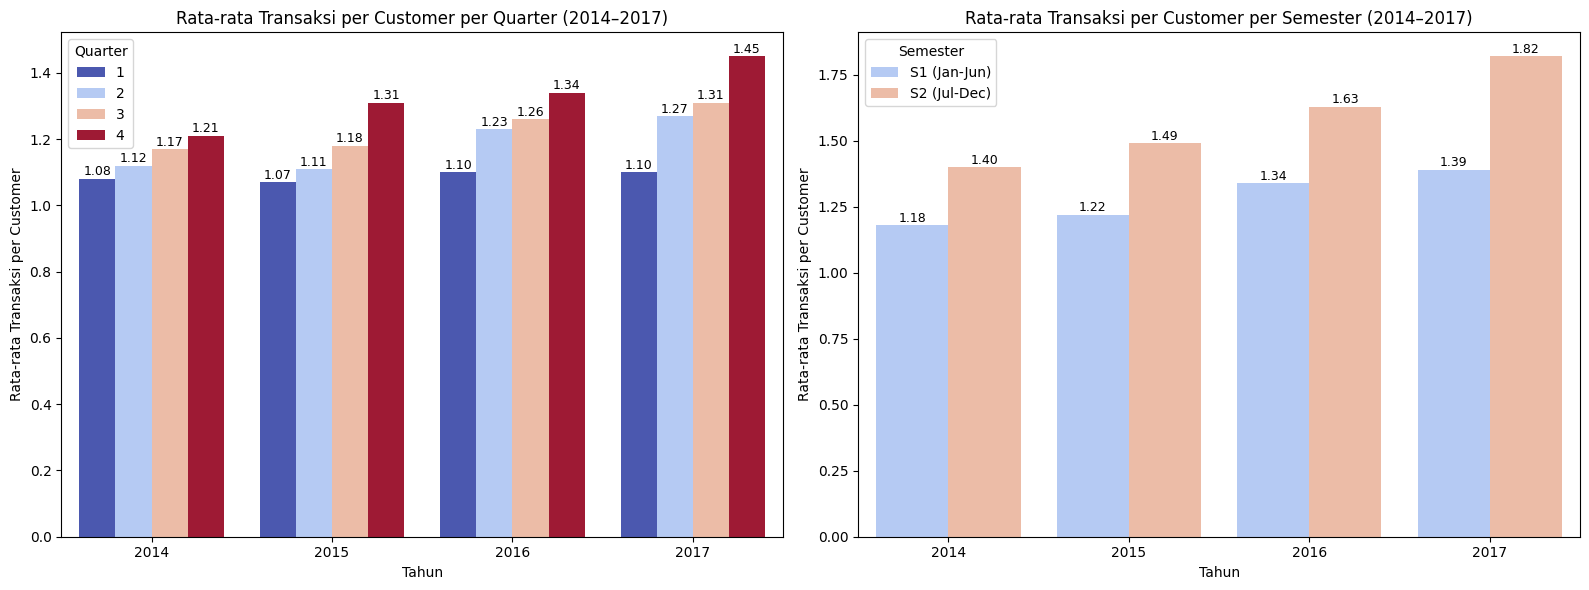

In [ ]:
# === Rata-rata Transaksi per Quarter ===
orders_per_quarter = df.groupby(['Year','Quarter'])['Order ID'].nunique().reset_index()
customers_per_quarter = df.groupby(['Year','Quarter'])['Customer ID'].nunique().reset_index()

avg_orders_quarter = pd.merge(orders_per_quarter, customers_per_quarter, on=['Year','Quarter'])
avg_orders_quarter.rename(columns={'Order ID':'Total Orders','Customer ID':'Unique Customers'}, inplace=True)
avg_orders_quarter['Avg Orders per Customer'] = round(avg_orders_quarter['Total Orders'] / avg_orders_quarter['Unique Customers'], 2)

# === Rata-rata Transaksi per Semester ===
orders_per_semester = df.groupby(['Year','Semester'])['Order ID'].nunique().reset_index()
customers_per_semester = df.groupby(['Year','Semester'])['Customer ID'].nunique().reset_index()

avg_orders_semester = pd.merge(orders_per_semester, customers_per_semester, on=['Year','Semester'])
avg_orders_semester.rename(columns={'Order ID':'Total Orders','Customer ID':'Unique Customers'}, inplace=True)
avg_orders_semester['Avg Orders per Customer'] = round(avg_orders_semester['Total Orders'] / avg_orders_semester['Unique Customers'], 2)

# === Subplot Quarter & Semester ===
fig, axes = plt.subplots(1, 2, figsize=(16,6))  # 1 baris, 2 kolom

# Subplot Quarter 
sns.barplot(data=avg_orders_quarter, x='Year', y='Avg Orders per Customer', hue='Quarter', 
            palette="coolwarm", ax=axes[0])
axes[0].set_title("Rata-rata Transaksi per Customer per Quarter (2014–2017)")
axes[0].set_ylabel("Rata-rata Transaksi per Customer")
axes[0].set_xlabel("Tahun")

for p in axes[0].patches:
    if p.get_height() > 0:
        axes[0].annotate(f'{p.get_height():.2f}',
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', fontsize=9, color='black',
                         xytext=(0, 5), textcoords='offset points')

# Subplot Semester 
sns.barplot(data=avg_orders_semester, x='Year', y='Avg Orders per Customer', hue='Semester', 
            palette="coolwarm", ax=axes[1])
axes[1].set_title("Rata-rata Transaksi per Customer per Semester (2014–2017)")
axes[1].set_ylabel("Rata-rata Transaksi per Customer")
axes[1].set_xlabel("Tahun")

for p in axes[1].patches:
    if p.get_height() > 0:
        axes[1].annotate(f'{p.get_height():.2f}',
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', fontsize=9, color='black',
                         xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

Rata-rata transaksi per customer meningkat stabil tiap tahun, dengan lonjakan terbesar di 2017. Puncaknya selalu terjadi di quarter 4 dan semester 2, yang menegaskan adanya pola musiman di akhir tahun. Artinya, pelanggan lebih sering bertransaksi di periode tersebut sehingga strategi promosi dan penjualan sebaiknya difokuskan pada paruh kedua tahun.

#### Jumlah Customer & Rata-Rata Transaksi per Segment / Customer

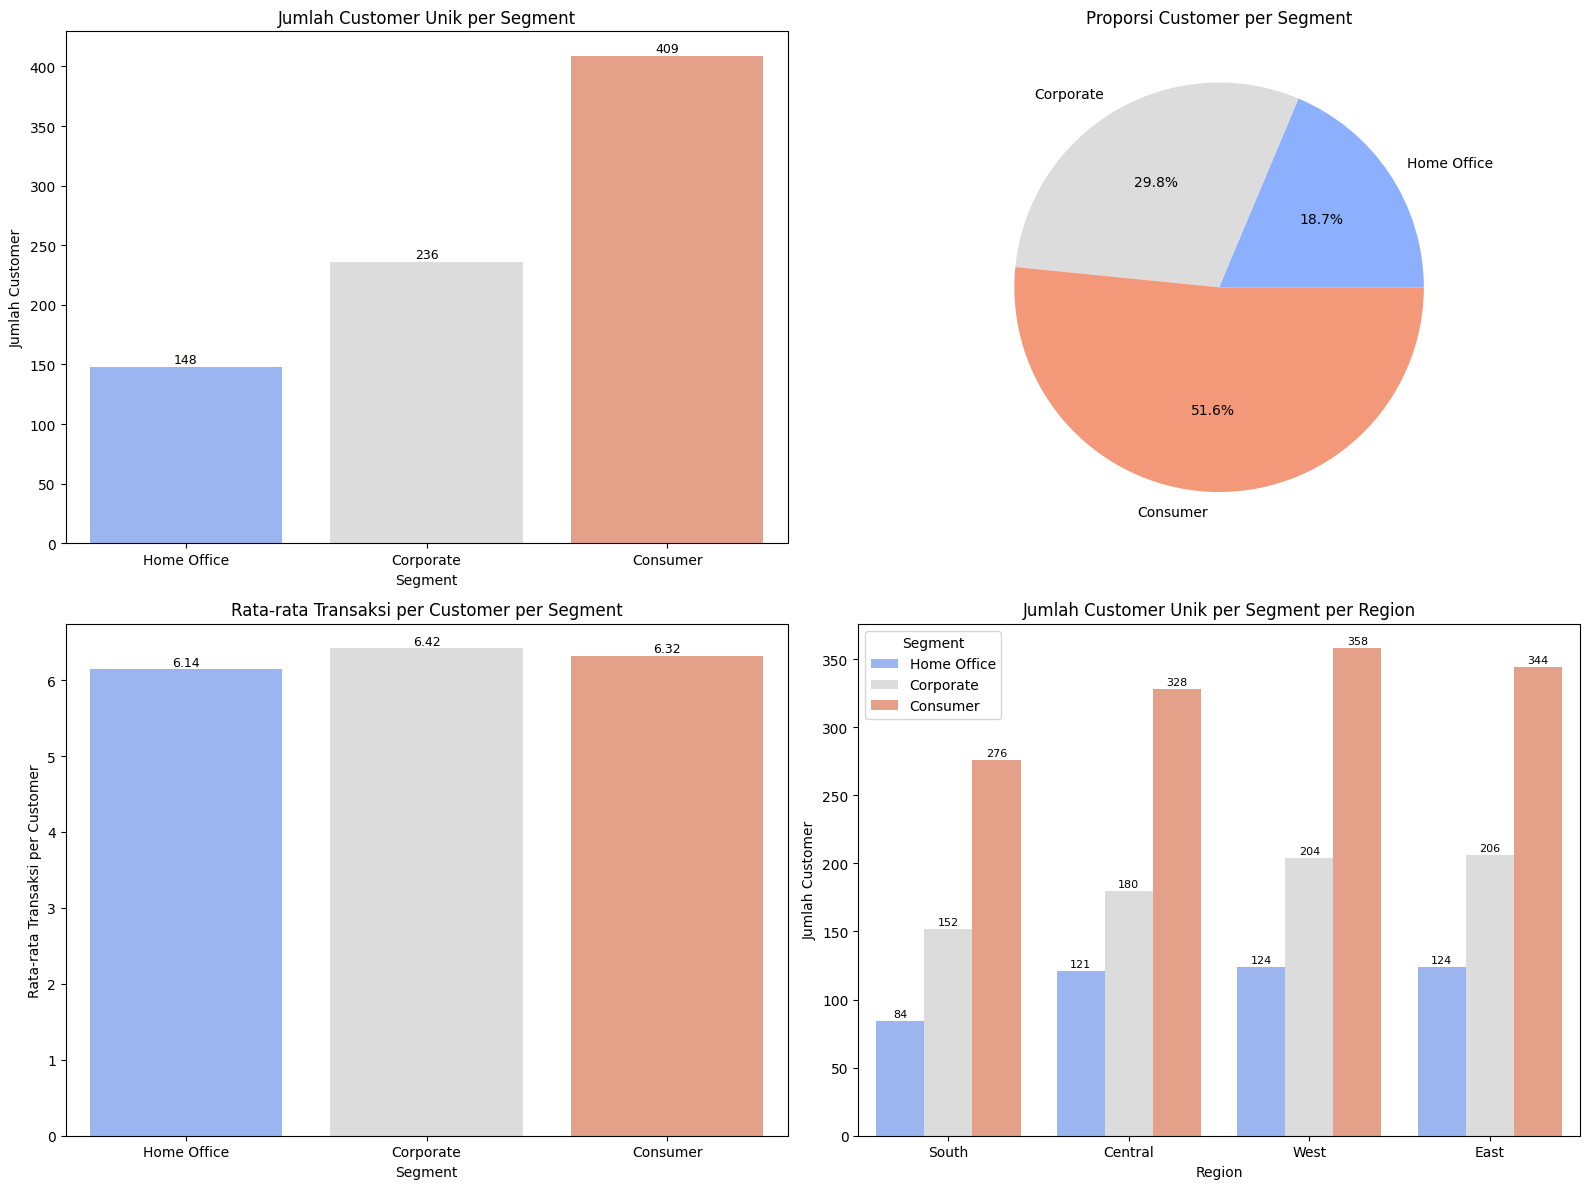

In [26]:
# === Jumlah Customer Unik per Segment ===
customers_per_segment = df.groupby('Segment')['Customer ID'].nunique().reset_index()
customers_per_segment.rename(columns={'Customer ID':'Unique Customers'}, inplace=True)

# Hitung proporsi (%)
total_customers = customers_per_segment['Unique Customers'].sum()
customers_per_segment['Proportion (%)'] = round(
    (customers_per_segment['Unique Customers'] / total_customers) * 100, 2
)

# === Rata-rata Transaksi per Customer ===
orders_per_segment = df.groupby('Segment')['Order ID'].nunique().reset_index()
orders_per_segment.rename(columns={'Order ID':'Total Orders'}, inplace=True)

segment_stats = pd.merge(customers_per_segment, orders_per_segment, on='Segment')
segment_stats['Avg Orders per Customer'] = round(
    segment_stats['Total Orders'] / segment_stats['Unique Customers'], 2
)
segment_stats = segment_stats.sort_values('Unique Customers', ascending=True)

# === Segment × Region ===
seg_region = df.groupby(['Region','Segment'])['Customer ID'].nunique().reset_index()
seg_region.rename(columns={'Customer ID':'Unique Customers'}, inplace=True)
seg_region = seg_region.sort_values('Unique Customers', ascending=True)

# === Subplot (2x2 grid) ===
fig, axes = plt.subplots(2, 2, figsize=(16,12))

# Chart 1: Jumlah Customer Unik per Segment
sns.barplot(data=segment_stats, x='Segment', y='Unique Customers', 
            palette="coolwarm", order=segment_stats['Segment'], ax=axes[0,0])
axes[0,0].set_title("Jumlah Customer Unik per Segment")
axes[0,0].set_ylabel("Jumlah Customer")
axes[0,0].set_xlabel("Segment")
for p in axes[0,0].patches:
    if p.get_height() > 0:
        axes[0,0].annotate(f'{int(p.get_height())}',
                           (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center', fontsize=9, color='black',
                           xytext=(0, 5), textcoords='offset points')

# Chart 2: Pie Chart Proporsi Customer
axes[0,1].pie(segment_stats['Unique Customers'],
              labels=segment_stats['Segment'],
              autopct='%1.1f%%',
              colors=sns.color_palette("coolwarm", len(segment_stats)))
axes[0,1].set_title("Proporsi Customer per Segment")

# Chart 3: Rata-rata Transaksi per Customer
sns.barplot(data=segment_stats, x='Segment', y='Avg Orders per Customer', 
            palette="coolwarm", order=segment_stats['Segment'], ax=axes[1,0])
axes[1,0].set_title("Rata-rata Transaksi per Customer per Segment")
axes[1,0].set_ylabel("Rata-rata Transaksi per Customer")
axes[1,0].set_xlabel("Segment")
for p in axes[1,0].patches:
    if p.get_height() > 0:
        axes[1,0].annotate(f'{p.get_height():.2f}',
                           (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center', fontsize=9, color='black',
                           xytext=(0, 5), textcoords='offset points')

# Chart 4: Segment × Region
sns.barplot(data=seg_region, x='Region', y='Unique Customers', hue='Segment',
            palette="coolwarm", ax=axes[1,1])
axes[1,1].set_title("Jumlah Customer Unik per Segment per Region")
axes[1,1].set_ylabel("Jumlah Customer")
axes[1,1].set_xlabel("Region")
for p in axes[1,1].patches:
    if p.get_height() > 0:
        axes[1,1].annotate(f'{int(p.get_height())}',
                           (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center', fontsize=8, color='black',
                           xytext=(0, 5), textcoords='offset points')
axes[1,1].legend(title="Segment")

plt.tight_layout()
plt.show()


Mayoritas customer berasal dari segmen Consumer, namun segmen Corporate lebih aktif dalam bertransaksi. Di sisi regional, West dan East adalah wilayah dengan jumlah customer terbanyak. Strategi bisnis sebaiknya memaksimalkan volume dari Consumer, sambil meningkatkan profitabilitas dari Corporate, khususnya di region West dan East.

#### Jumlah Customer & Rata-Rata Transaksi per Category / Product

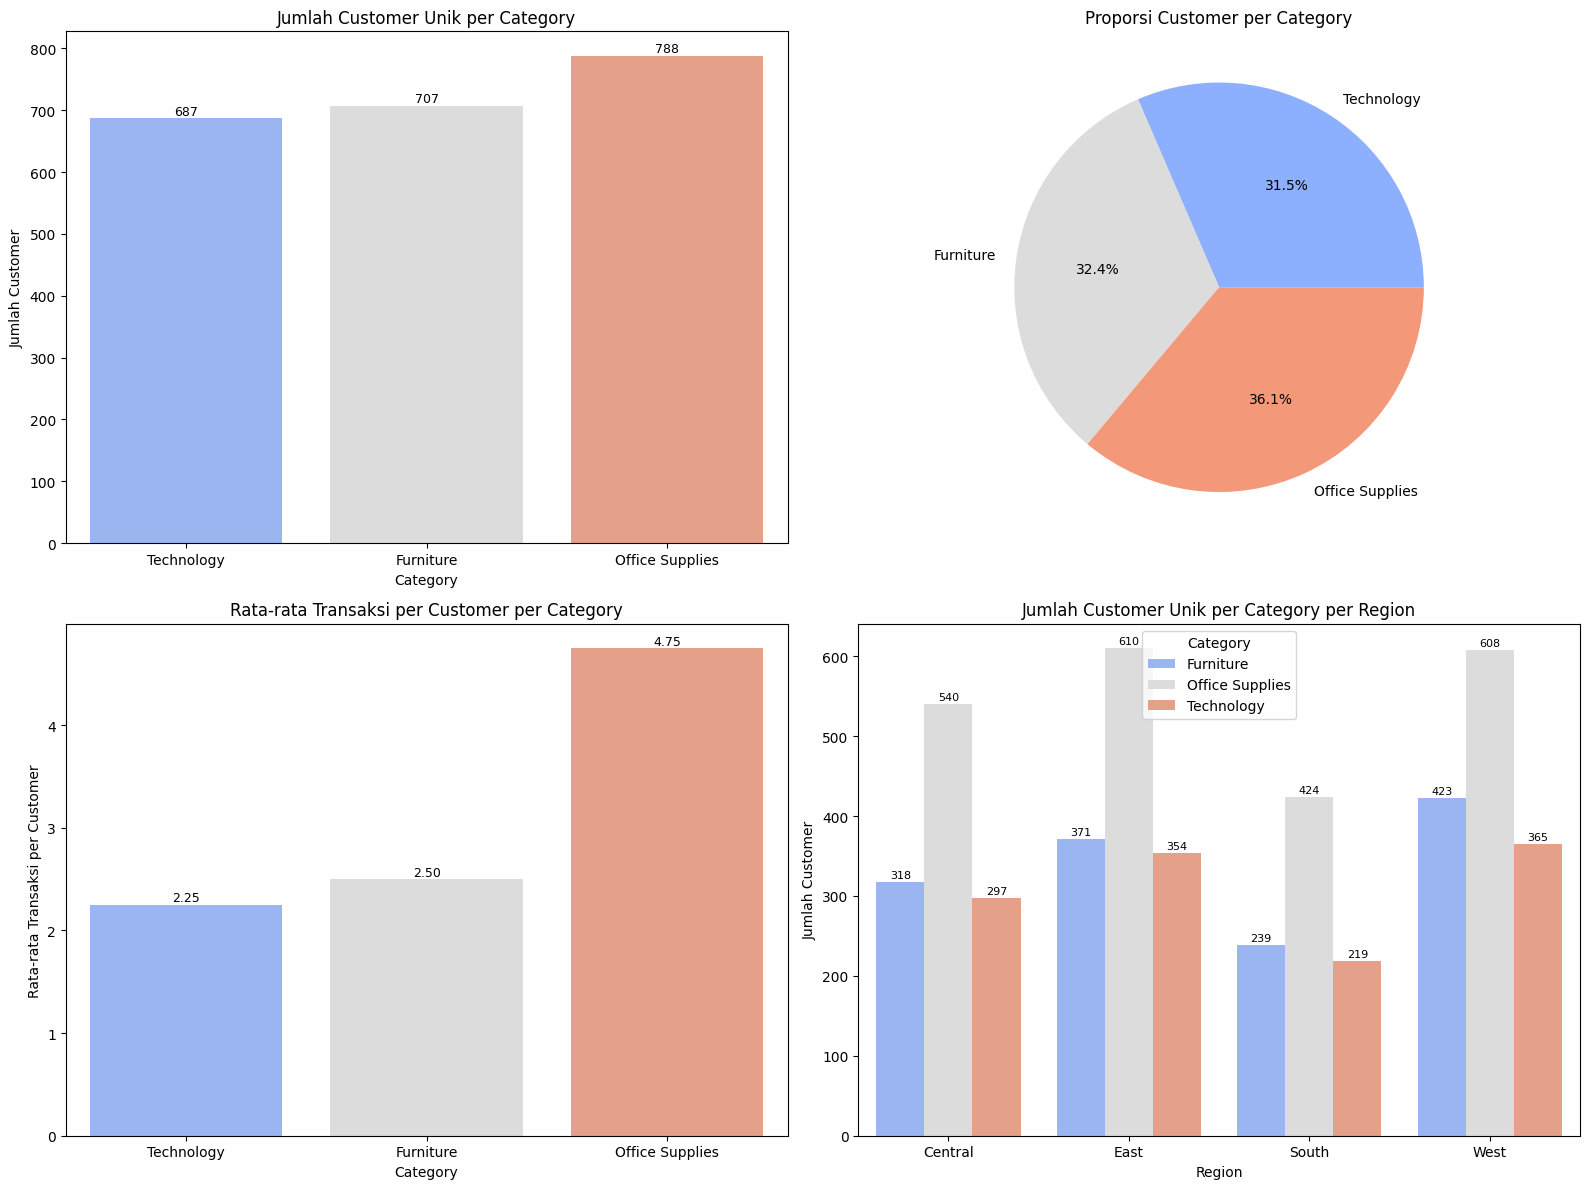

In [27]:
# === Jumlah Customer Unik per Category ===
customers_per_category = (
    df.groupby('Category')['Customer ID'].nunique().reset_index()
    .rename(columns={'Customer ID':'Unique Customers'})
)

# Hitung proporsi (%)
total_customers_cat = customers_per_category['Unique Customers'].sum()
customers_per_category['Proportion (%)'] = round(
    (customers_per_category['Unique Customers'] / total_customers_cat) * 100, 2
)

# === Rata-rata Transaksi per Customer (pakai total orders unik) ===
orders_per_category = (
    df.groupby('Category')['Order ID'].nunique().reset_index()
    .rename(columns={'Order ID':'Total Orders'})
)

category_stats = customers_per_category.merge(orders_per_category, on='Category')
category_stats['Avg Orders per Customer'] = round(
    category_stats['Total Orders'] / category_stats['Unique Customers'], 2
)
category_stats = category_stats.sort_values('Unique Customers', ascending=True)

# === Category × Region ===
cat_region = (
    df.groupby(['Region','Category'])['Customer ID'].nunique().reset_index()
    .rename(columns={'Customer ID':'Unique Customers'})
)

# === Subplot (2x2 grid) ===
fig, axes = plt.subplots(2, 2, figsize=(16,12))

# Chart 1: Jumlah Customer Unik per Category 
sns.barplot(
    data=category_stats, x='Category', y='Unique Customers',
    palette="coolwarm", order=category_stats['Category'], ax=axes[0,0]
)
axes[0,0].set_title("Jumlah Customer Unik per Category")
axes[0,0].set_ylabel("Jumlah Customer")
axes[0,0].set_xlabel("Category")
for p in axes[0,0].patches:
    if p.get_height() > 0:
        axes[0,0].annotate(f'{int(p.get_height())}',
                           (p.get_x() + p.get_width()/2., p.get_height()),
                           ha='center', va='center', fontsize=9, color='black',
                           xytext=(0,5), textcoords='offset points')

# Chart 2: Pie Chart Proporsi Customer
axes[0,1].pie(
    category_stats['Unique Customers'],
    labels=category_stats['Category'],
    autopct='%1.1f%%',
    colors=sns.color_palette("coolwarm", len(category_stats))
)
axes[0,1].set_title("Proporsi Customer per Category")

# Chart 3: Rata-rata Transaksi per Customer
sns.barplot(
    data=category_stats, x='Category', y='Avg Orders per Customer',
    palette="coolwarm", order=category_stats['Category'], ax=axes[1,0]
)
axes[1,0].set_title("Rata-rata Transaksi per Customer per Category")
axes[1,0].set_ylabel("Rata-rata Transaksi per Customer")
axes[1,0].set_xlabel("Category")
for p in axes[1,0].patches:
    if p.get_height() > 0:
        axes[1,0].annotate(f'{p.get_height():.2f}',
                           (p.get_x() + p.get_width()/2., p.get_height()),
                           ha='center', va='center', fontsize=9, color='black',
                           xytext=(0,5), textcoords='offset points')

# Chart 4: Category × Region
sns.barplot(
    data=cat_region, x='Region', y='Unique Customers', hue='Category',
    palette="coolwarm", ax=axes[1,1]
)
axes[1,1].set_title("Jumlah Customer Unik per Category per Region")
axes[1,1].set_ylabel("Jumlah Customer")
axes[1,1].set_xlabel("Region")
for p in axes[1,1].patches:
    if p.get_height() > 0:
        axes[1,1].annotate(f'{int(p.get_height())}',
                           (p.get_x() + p.get_width()/2., p.get_height()),
                           ha='center', va='center', fontsize=8, color='black',
                           xytext=(0,5), textcoords='offset points')
axes[1,1].legend(title="Category")

plt.tight_layout()
plt.show()

Kategori Office Supplies mendominasi baik dari sisi jumlah customer maupun frekuensi transaksi, sehingga menjadi kategori paling potensial. Sementara Furniture dan Technology memiliki jumlah customer cukup besar, tetapi transaksi per customer masih lebih rendah sehingga bisa menjadi area untuk peningkatan.

### Jumlah Customer Segment x Category

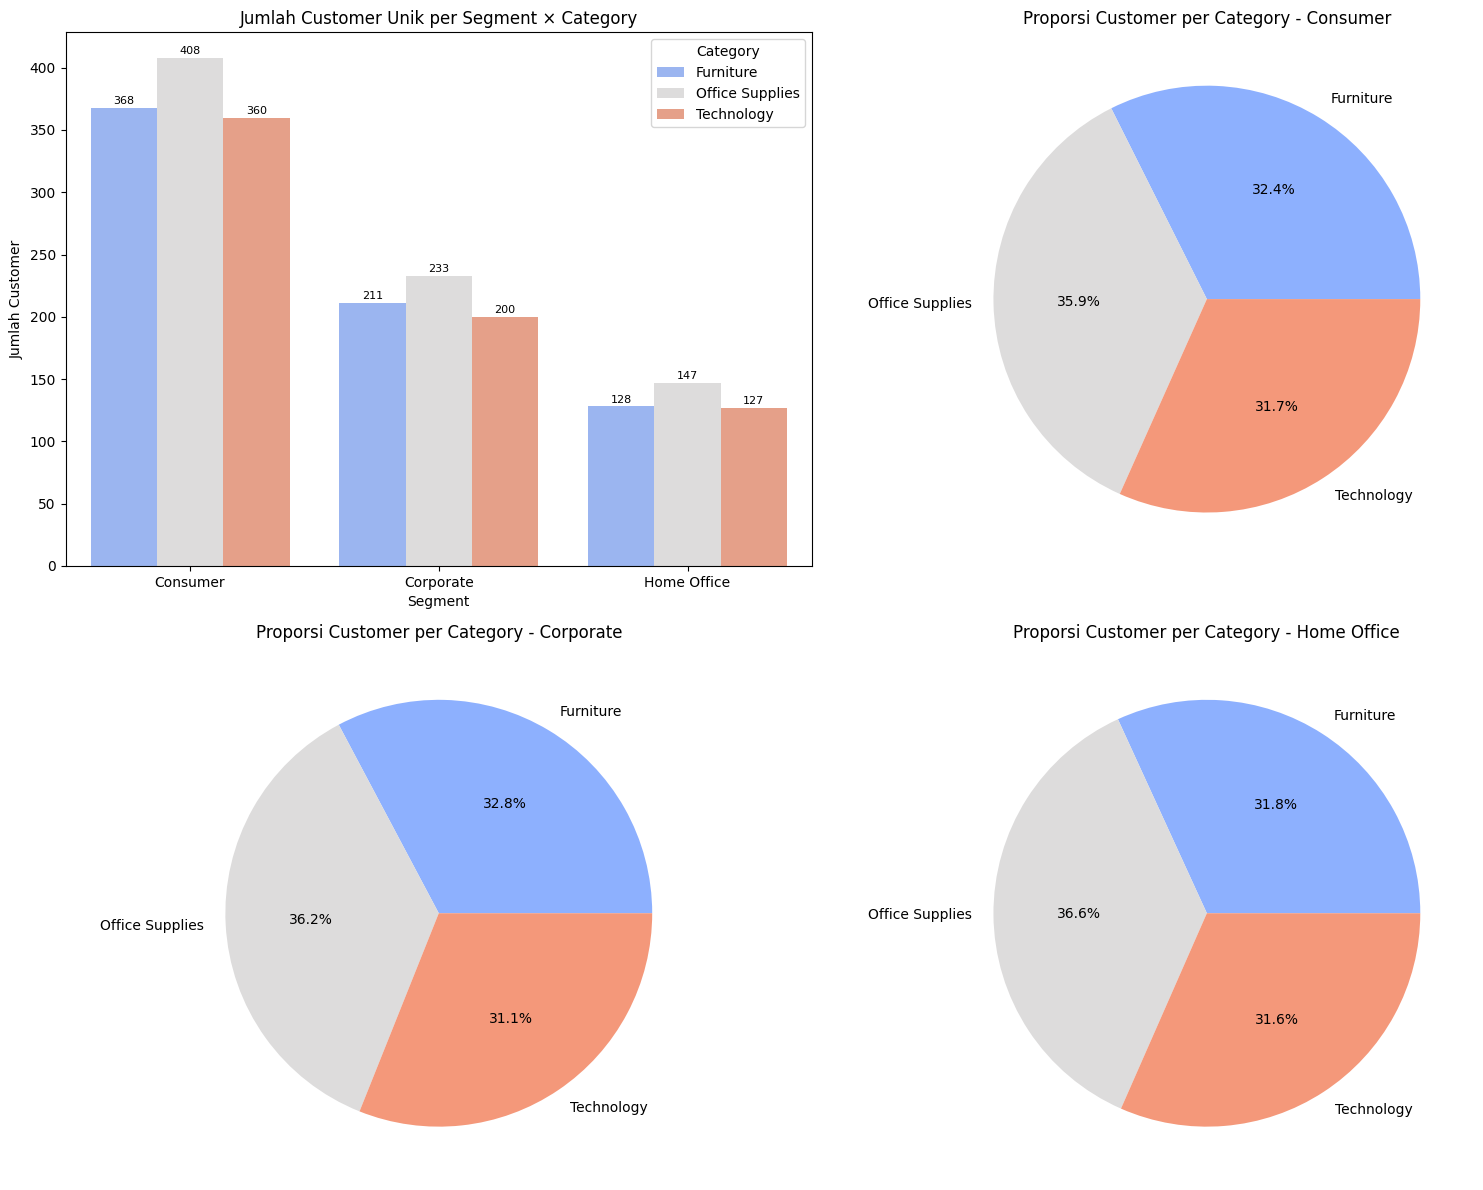

In [29]:
# Hitung jumlah customer unik per Segment × Category
seg_cat = (
    df.groupby(['Segment','Category'])['Customer ID']
      .nunique()
      .reset_index()
      .rename(columns={'Customer ID':'Unique Customers'})
)

# === Subplot (2x2 grid) ===
segments = seg_cat['Segment'].unique()
fig, axes = plt.subplots(2, 2, figsize=(16,12))

# Chart 1: Grouped Bar Chart 
sns.barplot(data=seg_cat, x='Segment', y='Unique Customers',
            hue='Category', palette='coolwarm', ax=axes[0,0])
axes[0,0].set_title("Jumlah Customer Unik per Segment × Category")
axes[0,0].set_ylabel("Jumlah Customer")
axes[0,0].set_xlabel("Segment")
for p in axes[0,0].patches:
    if p.get_height() > 0:
        axes[0,0].annotate(f'{int(p.get_height())}',
                           (p.get_x() + p.get_width()/2., p.get_height()),
                           ha='center', va='center', fontsize=8, color='black',
                           xytext=(0,5), textcoords='offset points')
axes[0,0].legend(title="Category")

# Chart 2–4: Pie Chart per Segment
for i, seg in enumerate(segments):
    r, c = divmod(i+1, 2)   
    temp = seg_cat[seg_cat['Segment']==seg]
    axes[r, c].pie(temp['Unique Customers'],
                   labels=temp['Category'],
                   autopct='%1.1f%%',
                   colors=sns.color_palette("coolwarm", len(temp)))
    axes[r, c].set_title(f"Proporsi Customer per Category - {seg}")

plt.tight_layout()
plt.show()


Dari visualisasi ini, kita bisa melihat bahwa pasar terbesar ada di Consumer, dengan Office Supplies sebagai kategori unggulan. Namun, Furniture dan Technology juga cukup stabil di semua segmen, sehingga strategi diferensiasi produk bisa diterapkan untuk menarik minat customer yang lebih spesifik.

### Sales vs Profit Margin per Category & Segment

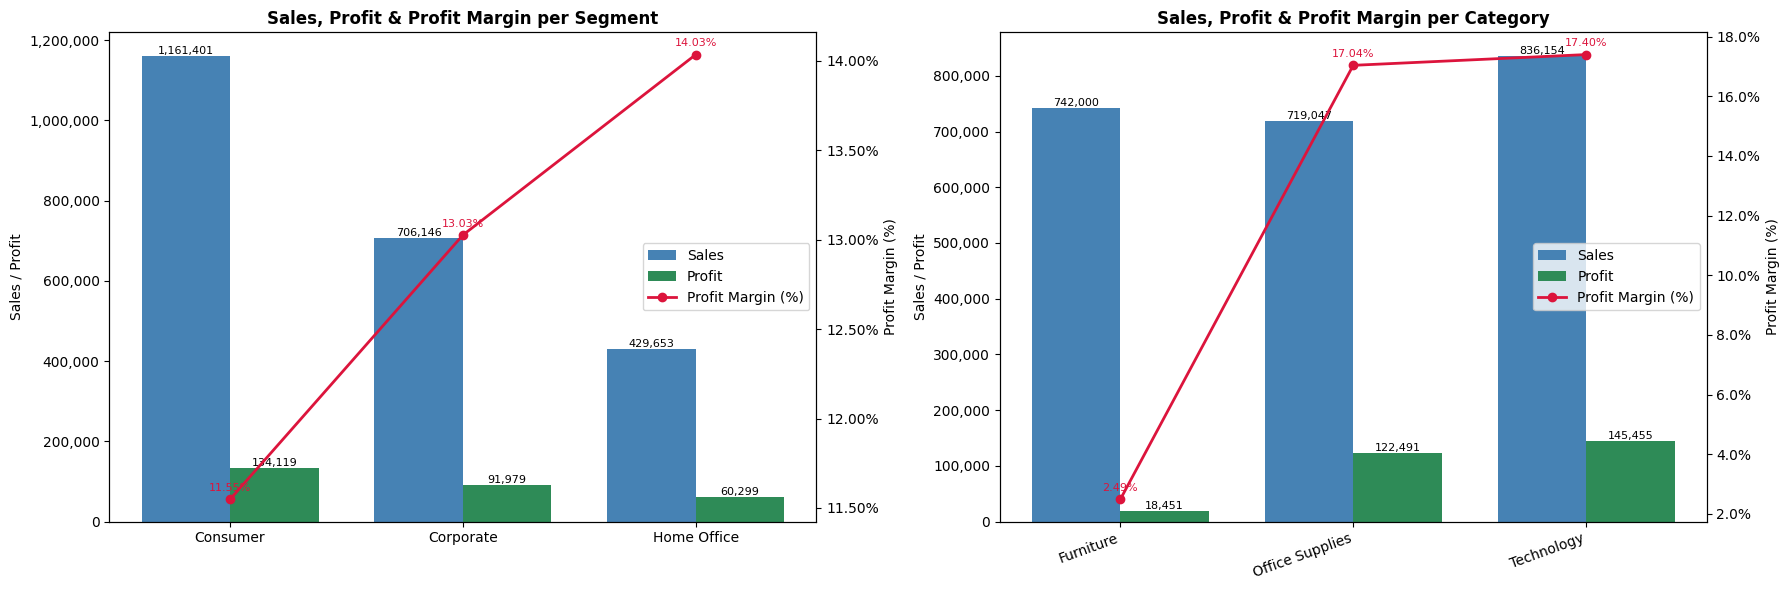

In [31]:
import matplotlib.ticker as mtick

# === Aggregate per Segment ===
seg_summary = df.groupby("Segment")[["Sales", "Profit"]].sum().reset_index()
seg_summary["Profit Margin (%)"] = (seg_summary["Profit"] / seg_summary["Sales"]) * 100

# === Aggregate per Category ===
cat_summary = df.groupby("Category")[["Sales", "Profit"]].sum().reset_index()
cat_summary["Profit Margin (%)"] = (cat_summary["Profit"] / cat_summary["Sales"]) * 100

# === Subplot ===
fig, axes = plt.subplots(1, 2, figsize=(18,6))

# Subplot Segment ---
x = seg_summary["Segment"].tolist()
sales = seg_summary["Sales"].values
profit = seg_summary["Profit"].values
margin = seg_summary["Profit Margin (%)"].values

idx = np.arange(len(x))
barw = 0.38

ax1 = axes[0]
b1 = ax1.bar(idx - barw/2, sales, width=barw, label="Sales", color="steelblue")
b2 = ax1.bar(idx + barw/2, profit, width=barw, label="Profit", color="seagreen")

for bars in (b1, b2):
    for p in bars:
        h = p.get_height()
        if h > 0:
            ax1.annotate(f"{h:,.0f}", (p.get_x()+p.get_width()/2, h),
                         ha="center", va="bottom", fontsize=8)

ax1.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
ax1.set_ylabel("Sales / Profit")
ax1.set_xticks(idx, x)

ax2 = ax1.twinx()
ax2.plot(idx, margin, marker="o", linewidth=2, color="crimson", label="Profit Margin (%)")
for xi, yi in zip(idx, margin):
    ax2.annotate(f"{yi:.2f}%", (xi, yi), textcoords="offset points",
                 xytext=(0,6), ha="center", fontsize=8, color="crimson")
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.set_ylabel("Profit Margin (%)")

ax1.set_title("Sales, Profit & Profit Margin per Segment", fontsize=12, fontweight="bold")
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc="center right")

# Subplot Category
x = cat_summary["Category"].tolist()
sales = cat_summary["Sales"].values
profit = cat_summary["Profit"].values
margin = cat_summary["Profit Margin (%)"].values

idx = np.arange(len(x))

ax1 = axes[1]
b1 = ax1.bar(idx - barw/2, sales, width=barw, label="Sales", color="steelblue")
b2 = ax1.bar(idx + barw/2, profit, width=barw, label="Profit", color="seagreen")

for bars in (b1, b2):
    for p in bars:
        h = p.get_height()
        if h > 0:
            ax1.annotate(f"{h:,.0f}", (p.get_x()+p.get_width()/2, h),
                         ha="center", va="bottom", fontsize=8)

ax1.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
ax1.set_ylabel("Sales / Profit")
ax1.set_xticks(idx, x)
ax1.set_xticklabels(x, rotation=20, ha="right")

ax2 = ax1.twinx()
ax2.plot(idx, margin, marker="o", linewidth=2, color="crimson", label="Profit Margin (%)")
for xi, yi in zip(idx, margin):
    ax2.annotate(f"{yi:.2f}%", (xi, yi), textcoords="offset points",
                 xytext=(0,6), ha="center", fontsize=8, color="crimson")
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.set_ylabel("Profit Margin (%)")

ax1.set_title("Sales, Profit & Profit Margin per Category", fontsize=12, fontweight="bold")
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc="center right")

plt.tight_layout()
plt.show()

Analisis menunjukkan bahwa segmen Consumer mendominasi penjualan, meskipun margin profitnya relatif rendah dibandingkan Corporate dan Home Office, di mana Home Office justru mencatat margin tertinggi meski volumenya kecil. Dari sisi kategori, Technology menjadi kontributor utama baik dari sisi sales maupun profit margin, diikuti Office Supplies dengan margin yang juga tinggi. Sebaliknya, Furniture walaupun memiliki nilai penjualan besar, hanya memberikan margin profit sangat rendah sehingga kurang berkontribusi terhadap profitabilitas keseluruhan.

# COHORT

### Cohort Retention Analysis Customer per Quarter / Semester

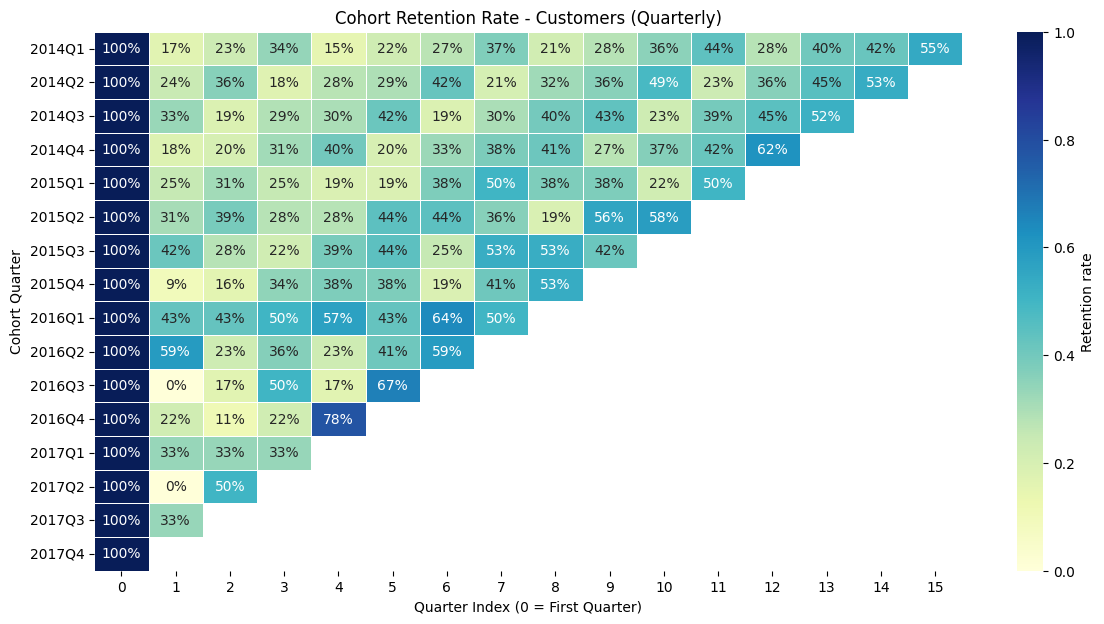

In [32]:
# Tentukan Cohort Quarter dan Quarter transaksi saat ini
df['cohort_quarter'] = df.groupby('Customer ID')['Order Date'].transform('min').dt.to_period('Q')
df['current_transaction_quarter'] = df['Order Date'].dt.to_period('Q')

df_agg_q = df[['cohort_quarter','current_transaction_quarter','Customer ID']]

# Hitung jumlah unique customer di tiap kombinasi
df_count_q = (
    df_agg_q.groupby(['cohort_quarter','current_transaction_quarter'])['Customer ID']
            .nunique()  
            .reset_index()
            .rename(columns={'Customer ID':'count_user'}) 
)

# Hitung period_distance (jarak antar quarter)
df_count_q['period_distance'] = (
    (df_count_q['current_transaction_quarter'].dt.year - df_count_q['cohort_quarter'].dt.year)*4 +
    (df_count_q['current_transaction_quarter'].dt.quarter - df_count_q['cohort_quarter'].dt.quarter)
)

# Buat grid lengkap hingga horizon & isi 0 untuk periode valid tanpa pembeli
max_curr_q = df_count_q['current_transaction_quarter'].max()
cohorts = df_count_q['cohort_quarter'].drop_duplicates().sort_values()
rows = []
for cq in cohorts:
    max_dist = (max_curr_q.year - cq.year) * 4 + (max_curr_q.quarter - cq.quarter)
    for d in range(0, max_dist + 1):
        rows.append((cq, d))
full_grid = pd.DataFrame(rows, columns=['cohort_quarter','period_distance'])

counts = (df_count_q.groupby(['cohort_quarter','period_distance'])['count_user']
                  .sum()
                  .reset_index())

full_counts = full_grid.merge(counts, on=['cohort_quarter','period_distance'], how='left')
full_counts['count_user'] = full_counts['count_user'].fillna(0)

# Pivot & hitung retention rate 
cohort_q = full_counts.pivot_table(index='cohort_quarter',
                                   columns='period_distance',
                                   values='count_user',
                                   aggfunc='sum')

cohort_q = cohort_q.sort_index()
cohort_sizes = cohort_q[0].replace({0: np.nan})
cohort_q_rate = cohort_q.divide(cohort_sizes, axis=0)

# Visualisasi heatmap 
plt.figure(figsize=(14,7))
sns.heatmap(cohort_q_rate,
            annot=True, fmt='.0%', cmap='YlGnBu',
            vmin=0, vmax=1, linewidths=.5, linecolor='white',
            cbar_kws={'label':'Retention rate'},
            mask=cohort_q_rate.isna())  
plt.title('Cohort Retention Rate - Customers (Quarterly)')
plt.xlabel('Quarter Index (0 = First Quarter)')
plt.ylabel('Cohort Quarter')
plt.yticks(rotation=0)
plt.xticks(rotation=0)
plt.show()


Dari visualisasi ini, kita bisa melihat bahwa sebagian besar customer cepat churn setelah pembelian pertama, namun ada beberapa periode (terutama 2015Q4–2016Q4) yang menunjukkan retensi kuat. Hal ini menandakan adanya faktor tertentu (misalnya promosi, produk, atau strategi layanan) yang berhasil membuat customer lebih loyal pada periode tersebut.

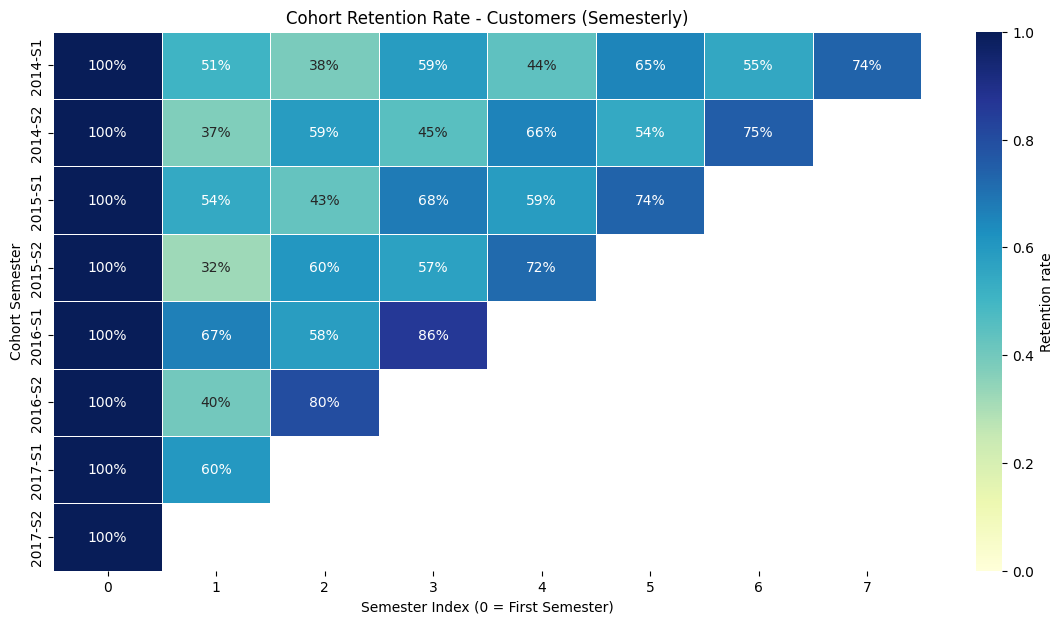

In [33]:
# Buat kolom semester dari Order Date
month = df['Order Date'].dt.month   
year = df['Order Date'].dt.year    
sem = np.where(month <= 6, 1, 2)   # semester 1 = Jan–Jun, semester 2 = Jul–Des

# Tentukan semester pertama kali customer belanja (cohort)
df['cohort_sem'] = df.groupby('Customer ID')['Order Date'].transform('min')  
sem_first = np.where(df['cohort_sem'].dt.month <= 6, 1, 2)                
df['cohort_sem'] = df['cohort_sem'].dt.year.astype(str) + '-S' + sem_first.astype(str)  
df['cohort_sem_ord'] = df['cohort_sem'].str.extract(r'(\d{4})').astype(int)[0]*2 + (sem_first-1)

# Tentukan semester transaksi untuk setiap order
df['current_transaction_sem'] = year.astype(str) + '-S' + sem.astype(str)      
df['current_transaction_sem_ord'] = year*2 + (sem-1)                           

df_agg_s = df[['cohort_sem','cohort_sem_ord','current_transaction_sem',
               'current_transaction_sem_ord','Customer ID']]

# Hitung jumlah unique customer untuk setiap kombinasi
df_count_s = (
    df_agg_s.groupby(['cohort_sem','cohort_sem_ord',
                      'current_transaction_sem','current_transaction_sem_ord'])['Customer ID']
            .nunique()   
            .reset_index()
            .rename(columns={'Customer ID':'count_user'})  
)

# Hitung jarak semester (period_distance)
df_count_s['period_distance'] = (
    df_count_s['current_transaction_sem_ord'] - df_count_s['cohort_sem_ord']
)

# Pivot jadi matriks cohort
# index   = cohort_sem (contoh: 2014-S1)
# columns = period_distance
# values  = count_user (jumlah customer unik)
# ================================================================
cohort_s = df_count_s.pivot_table(
    index='cohort_sem', columns='period_distance', values='count_user'
)

# Hitung retention rate
cohort_s_rate = cohort_s.divide(cohort_s[0], axis=0)

# Urutkan index cohort secara kronologis
ord_map = (df_agg_s[['cohort_sem','cohort_sem_ord']]
           .drop_duplicates()
           .sort_values('cohort_sem_ord')
           .set_index('cohort_sem')['cohort_sem_ord'])
cohort_s_rate = cohort_s_rate.loc[ord_map.index]

# Visualisasi heatmap retention cohort semesterly
plt.figure(figsize=(14,7))
sns.heatmap(cohort_s_rate, annot=True, fmt='.0%', cmap='YlGnBu',
            vmin=0, vmax=1, linewidths=.5, linecolor='white',
            cbar_kws={'label':'Retention rate'})
plt.title('Cohort Retention Rate - Customers (Semesterly)')
plt.xlabel('Semester Index (0 = First Semester)')
plt.ylabel('Cohort Semester')
plt.show()

Dari visualisasi ini, kita bisa melihat bahwa secara keseluruhan, retensi customer lebih stabil jika dilihat per semester. Beberapa periode (seperti 2015-S2 dan 2016-S1) berhasil menjaga loyalitas customer dengan sangat baik, bahkan hingga 3–4 tahun. Ini menunjukkan adanya faktor strategi atau kondisi khusus di periode tersebut yang efektif meningkatkan customer loyalty.

### Cohort Retention Analysis by Segment / Customer

In [42]:
# Step 1: Tentukan semester transaksi untuk setiap order
# (1 = Jan–Jun, 2 = Jul–Des)
month = df['Order Date'].dt.month
year  = df['Order Date'].dt.year
sem   = np.where(month <= 6, 1, 2)

df['current_sem'] = year.astype(str) + '-S' + sem.astype(str)
df['current_sem_ord'] = year*2 + (sem-1)

# Tentukan semester pertama (cohort) tiap customer dalam segment
first_sem = (
    df.groupby(['Segment','Customer ID'])
      .agg(first_date=('Order Date','min'))
      .reset_index()
)

first_month = first_sem['first_date'].dt.month
first_year  = first_sem['first_date'].dt.year
first_sem['CohortSemLabel'] = first_year.astype(str) + '-S' + np.where(first_month<=6,1,2).astype(str)
first_sem['CohortSemOrd']   = first_year*2 + np.where(first_month<=6,1,2)-1

# Gabungkan info cohort ke df utama
df_seg = df.merge(first_sem[['Segment','Customer ID','CohortSemLabel','CohortSemOrd']],
                  on=['Segment','Customer ID'], how='left')

# Step 2: Hitung jarak semester (CohortIndex)
df_seg['CohortIndex'] = df_seg['current_sem_ord'] - df_seg['CohortSemOrd']

# Step 3: Agregasi jumlah customer unik tiap cohort-semester
df_count_s = (
    df_seg.groupby(['Segment','CohortSemLabel','CohortSemOrd',
                    'current_sem','current_sem_ord','CohortIndex'])['Customer ID']
          .nunique()
          .reset_index()
          .rename(columns={'Customer ID':'count_user'})
)

# Step 4: Bangun retention matrix per segment
# (isi 0 kalau periode valid tapi tidak ada pembeli, NaN untuk periode di luar horizon)
cohort_retention_segments = {}

for seg in df_count_s['Segment'].unique():
    temp = df_count_s[df_count_s['Segment'] == seg].copy()

    # Horizon data (semester terakhir yang ada untuk segment ini)
    max_current_ord = temp['current_sem_ord'].max()

    # Daftar cohort unik (label + ordinal)
    cohorts = temp[['CohortSemLabel', 'CohortSemOrd']].drop_duplicates()

    # Buat grid cohort × CohortIndex sampai horizon
    rows = []
    for _, r in cohorts.iterrows():
        max_idx_possible = int(max_current_ord - r['CohortSemOrd'])
        for k in range(0, max_idx_possible + 1):
            rows.append((r['CohortSemLabel'], r['CohortSemOrd'], k))
    full_grid = pd.DataFrame(rows, columns=['CohortSemLabel', 'CohortSemOrd', 'CohortIndex'])

    # Hitung ulang customer unik per CohortSemLabel & CohortIndex
    counts = (
        temp.groupby(['CohortSemLabel', 'CohortIndex'])['count_user']
            .sum()
            .reset_index()
    )

    # Gabungkan grid dengan hasil count → isi 0 jika kosong
    temp_full = full_grid.merge(counts, on=['CohortSemLabel', 'CohortIndex'], how='left')
    temp_full['count_user'] = temp_full['count_user'].fillna(0)

    # Pivot ke matriks (baris = CohortSemLabel, kolom = CohortIndex)
    cohort = temp_full.pivot_table(index='CohortSemLabel',
                                   columns='CohortIndex',
                                   values='count_user',
                                   aggfunc='sum')

    # Urutkan baris berdasarkan ordinal cohort
    order_idx = cohorts.sort_values('CohortSemOrd')['CohortSemLabel']
    cohort = cohort.loc[order_idx]

    # Hitung retention rate (dibagi cohort size kolom 0)
    cohort_rate = cohort.divide(cohort[0].replace({0: np.nan}), axis=0)

    # Simpan hasil per segment
    cohort_retention_segments[seg] = cohort_rate

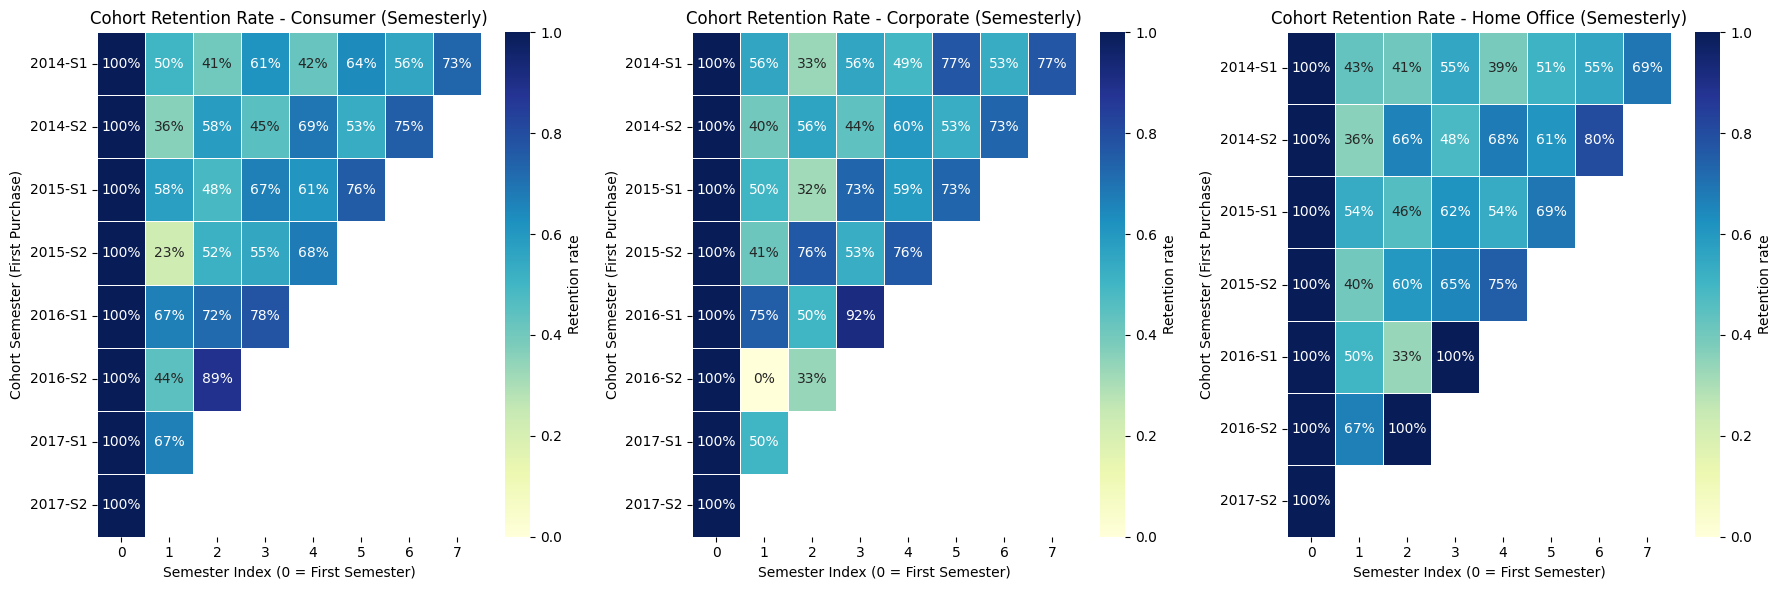

In [43]:
# Visualisasi retention matrix semua segment dalam subplot
n_seg = len(cohort_retention_segments)
fig, axes = plt.subplots(1, n_seg, figsize=(6*n_seg, 6))

if n_seg == 1:
    axes = [axes]

for ax, (seg, matrix) in zip(axes, cohort_retention_segments.items()):
    sns.heatmap(matrix, annot=True, fmt='.0%', cmap='YlGnBu', vmin=0, vmax=1,
                linewidths=.5, linecolor='white',
                cbar_kws={'label':'Retention rate'},
                mask=matrix.isna(),
                ax=ax)
    ax.set_title(f'Cohort Retention Rate - {seg} (Semesterly)')
    ax.set_xlabel('Semester Index (0 = First Semester)')
    ax.set_ylabel('Cohort Semester (First Purchase)')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()


## Per Segment

Home Office → Retensi stabil >50% sejak awal. Pola belanja bertahap (meja → kursi → aksesori). Strategi: cross-selling, bundling, loyalty.

Corporate → Retensi paling tinggi (>70%), konsisten karena kontrak B2B rutin. Strategi: layanan premium, kontrak jangka panjang, eksklusif.

Consumer → Retensi fluktuatif, dipengaruhi musiman (liburan, diskon). Strategi: kampanye musiman, flash sale, loyalty berbasis poin.

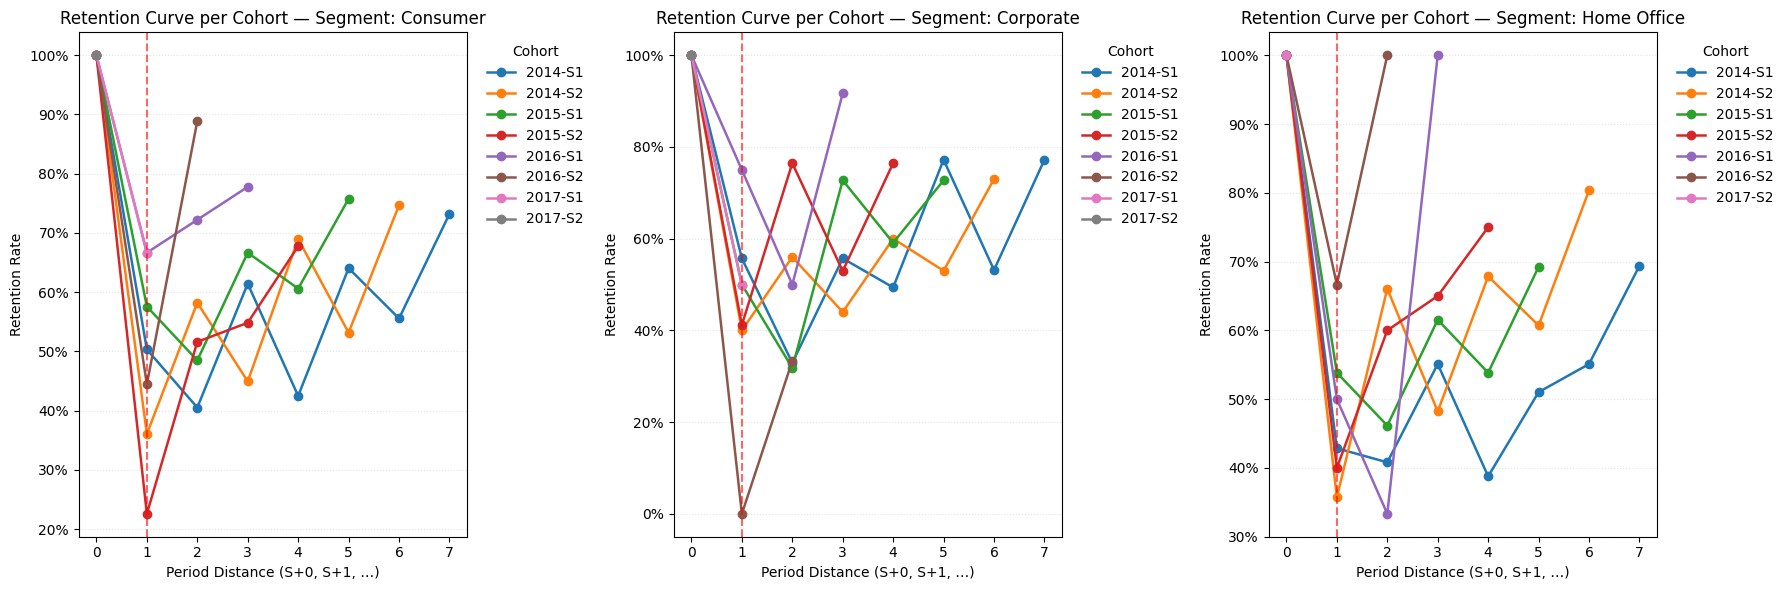

In [38]:
from matplotlib.ticker import PercentFormatter

# --- Subplot retention curve per segment ---
segments = list(cohort_retention_segments.keys())
n_seg = len(segments)

fig, axes = plt.subplots(1, n_seg, figsize=(6*n_seg, 6))

# Jika hanya 1 segmen, axes bukan array → jadikan list
if n_seg == 1:
    axes = [axes]

for ax, seg in zip(axes, segments):
    mat = cohort_retention_segments[seg].copy()
    long_df = (
        mat.reset_index()
           .melt(id_vars='CohortSemLabel', var_name='period_distance', value_name='retention')
           .dropna()
    )
    long_df['period_distance'] = long_df['period_distance'].astype(int)

    # plot tiap cohort jadi satu garis
    for coh, sub in long_df.groupby('CohortSemLabel'):
        sub = sub.sort_values('period_distance')
        ax.plot(sub['period_distance'], sub['retention'], marker='o', linewidth=1.8, label=coh)

    # garis referensi churn awal (S+1)
    ax.axvline(x=1, color='red', linestyle='--', alpha=0.6)

    ax.set_title(f"Retention Curve per Cohort — Segment: {seg}")
    ax.set_xlabel("Period Distance (S+0, S+1, …)")
    ax.set_ylabel("Retention Rate")
    ax.yaxis.set_major_formatter(PercentFormatter(1.0))
    ax.set_xticks(np.arange(long_df['period_distance'].min(), long_df['period_distance'].max()+1))
    ax.grid(axis='y', linestyle=':', alpha=0.35)

    # legend di luar, biar tidak nutup chart
    ax.legend(title='Cohort', bbox_to_anchor=(1.02, 1), loc='upper left', frameon=False)

plt.tight_layout()
plt.show()

### Cohort Retention Analysis by Category / Product (Period by Quarter & Semester)

#### Period Semester

In [39]:
# Tentukan current semester (Jan–Jun = S1, Jul–Dec = S2)
month = df['Order Date'].dt.month
year  = df['Order Date'].dt.year
sem   = np.where(month <= 6, 1, 2)

df['current_sem'] = year.astype(str) + '-S' + sem.astype(str)
df['current_sem_ord'] = year*2 + (sem-1)

# Untuk tiap customer + category → semester pertama kali transaksi
first_sem_cat = (
    df.groupby(['Category','Customer ID'])
      .agg(first_date=('Order Date','min'))
      .reset_index()
)

first_month = first_sem_cat['first_date'].dt.month
first_year  = first_sem_cat['first_date'].dt.year
first_sem_cat['CohortSemLabel'] = first_year.astype(str) + '-S' + np.where(first_month<=6,1,2).astype(str)
first_sem_cat['CohortSemOrd']   = first_year*2 + (np.where(first_month<=6,1,2)-1)

# Merge cohort info ke df utama
df_cat = df.merge(first_sem_cat[['Category','Customer ID','CohortSemLabel','CohortSemOrd']],
                  on=['Category','Customer ID'], how='left')

# Hitung CohortIndex
df_cat['CohortIndex'] = df_cat['current_sem_ord'] - df_cat['CohortSemOrd']

# Agregasi → hitung unique customers tiap cohort-semester
df_count_cat = (
    df_cat.groupby(['Category','CohortSemLabel','CohortSemOrd','current_sem','current_sem_ord','CohortIndex'])['Customer ID']
          .nunique()
          .reset_index()
          .rename(columns={'Customer ID':'count_user'})
)

# Pivot retention matrix per category
cohort_retention_categories = {}
for cat in df_count_cat['Category'].unique():
    temp = df_count_cat[df_count_cat['Category']==cat]
    cohort = temp.pivot_table(index='CohortSemLabel',
                              columns='CohortIndex',
                              values='count_user')
    cohort_rate = cohort.divide(cohort[0], axis=0)

    # urutkan berdasarkan ordinal
    order_idx = (temp[['CohortSemLabel','CohortSemOrd']].drop_duplicates()
                 .sort_values('CohortSemOrd')['CohortSemLabel'])
    cohort_rate = cohort_rate.loc[order_idx]

    cohort_retention_categories[cat] = cohort_rate


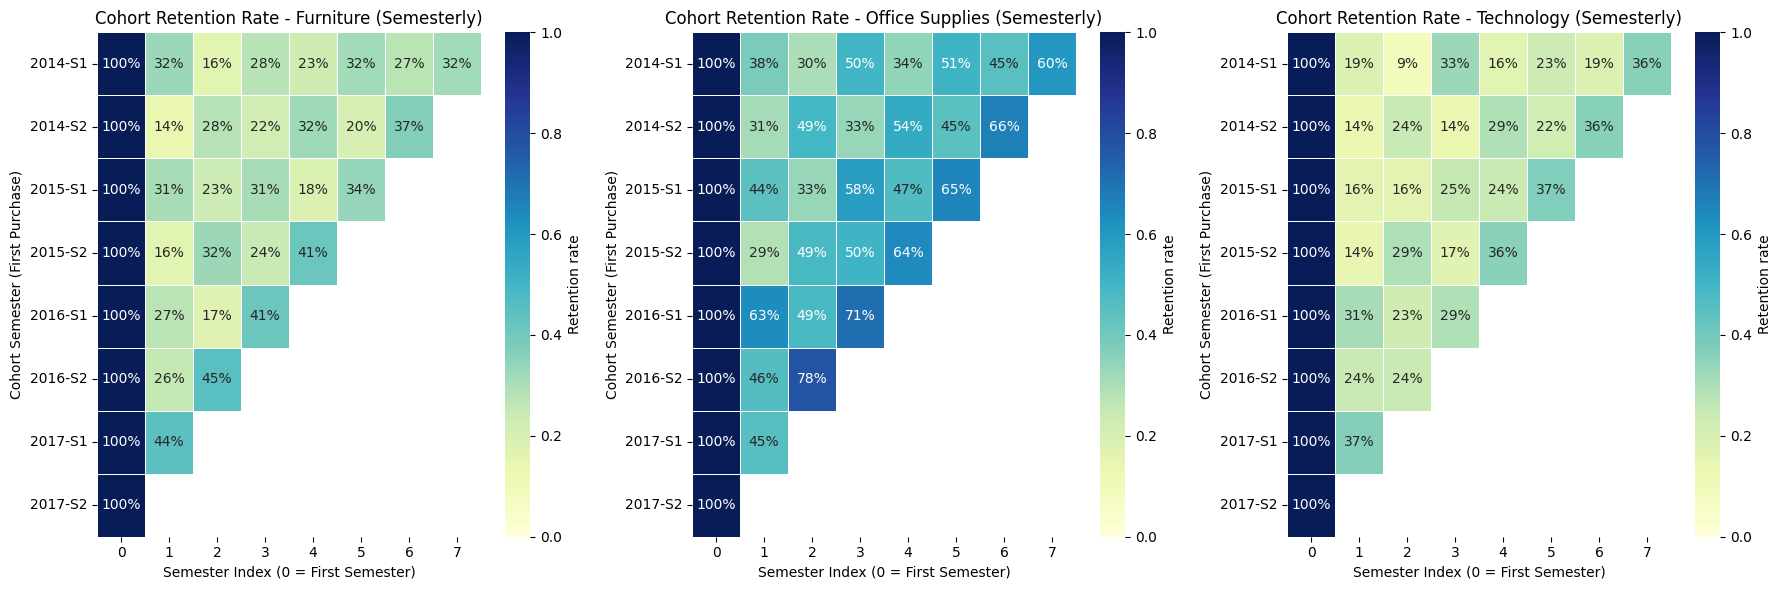

In [41]:
# Visualisasi retention matrix per category dalam subplot
categories = list(cohort_retention_categories.keys())
n_cat = len(categories)

fig, axes = plt.subplots(1, n_cat, figsize=(6*n_cat, 6))

if n_cat == 1:
    axes = [axes]

for ax, cat in zip(axes, categories):
    matrix = cohort_retention_categories[cat]
    sns.heatmap(matrix, annot=True, fmt='.0%', cmap='YlGnBu', vmin=0, vmax=1,
                linewidths=.5, linecolor='white',
                cbar_kws={'label':'Retention rate'}, ax=ax)
    ax.set_title(f'Cohort Retention Rate - {cat} (Semesterly)')
    ax.set_xlabel('Semester Index (0 = First Semester)')
    ax.set_ylabel('Cohort Semester (First Purchase)')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()

#### Period Quarter

In [44]:
# tentukan quarter transaksi berjalan
df['current_quarter'] = df['Order Date'].dt.to_period('Q')
df['current_quarter_ord'] = (df['Order Date'].dt.year * 4) + (df['Order Date'].dt.quarter - 1)

# tentukan quarter pertama (cohort) per customer dalam setiap kategori
first_q_cat = (
    df.groupby(['Category','Customer ID'])['Order Date']
      .min()
      .reset_index(name='first_date')
)
first_q_cat['CohortQuarter']     = first_q_cat['first_date'].dt.to_period('Q')   # ex: 2014Q1
first_q_cat['CohortQuarterOrd']  = (first_q_cat['first_date'].dt.year * 4) + (first_q_cat['first_date'].dt.quarter - 1)

df_cat_q = df.merge(
    first_q_cat[['Category','Customer ID','CohortQuarter','CohortQuarterOrd']],
    on=['Category','Customer ID'], how='left'
)

# hitung CohortIndex = jarak quarter dari cohort
df_cat_q['CohortIndex'] = df_cat_q['current_quarter_ord'] - df_cat_q['CohortQuarterOrd']

# agregasi jumlah customer unik per kombinasi cohort dan quarter
df_count_cat_q = (
    df_cat_q.groupby(['Category','CohortQuarter','CohortQuarterOrd','current_quarter','current_quarter_ord','CohortIndex'])['Customer ID']
            .nunique()
            .reset_index()
            .rename(columns={'Customer ID':'count_user'})
)

# bangun retention matrix per kategori
cohort_retention_categories_q = {}

for cat in df_count_cat_q['Category'].unique():
    temp = df_count_cat_q[df_count_cat_q['Category'] == cat].copy()

    max_current_ord = temp['current_quarter_ord'].max()

    cohorts = temp[['CohortQuarter', 'CohortQuarterOrd']].drop_duplicates().sort_values('CohortQuarterOrd')

    # Bangun grid lengkap (CohortQuarter x CohortIndex) sampai horizon kategori
    rows = []
    for _, r in cohorts.iterrows():
        max_idx_possible = int(max_current_ord - r['CohortQuarterOrd'])
        for k in range(0, max_idx_possible + 1):
            rows.append((r['CohortQuarter'], r['CohortQuarterOrd'], k))
    full_grid = pd.DataFrame(rows, columns=['CohortQuarter', 'CohortQuarterOrd', 'CohortIndex'])

    # hitung ulang customer unik untuk memastikan data konsisten
    counts = (temp.groupby(['CohortQuarter','CohortIndex'])['count_user']
                  .sum()
                  .reset_index())

    temp_full = full_grid.merge(counts, on=['CohortQuarter','CohortIndex'], how='left')
    temp_full['count_user'] = temp_full['count_user'].fillna(0)

    # Pivot ke bentuk matriks (baris = CohortQuarter, kolom = CohortIndex)
    cohort = temp_full.pivot_table(index='CohortQuarter',
                                   columns='CohortIndex',
                                   values='count_user',
                                   aggfunc='sum')

    # Urutkan cohort berdasarkan waktu
    order_idx = cohorts['CohortQuarter']
    cohort = cohort.loc[order_idx]

    cohort_size = cohort[0].replace({0: np.nan})
    cohort_rate = cohort.divide(cohort_size, axis=0)

    cohort_retention_categories_q[cat] = cohort_rate


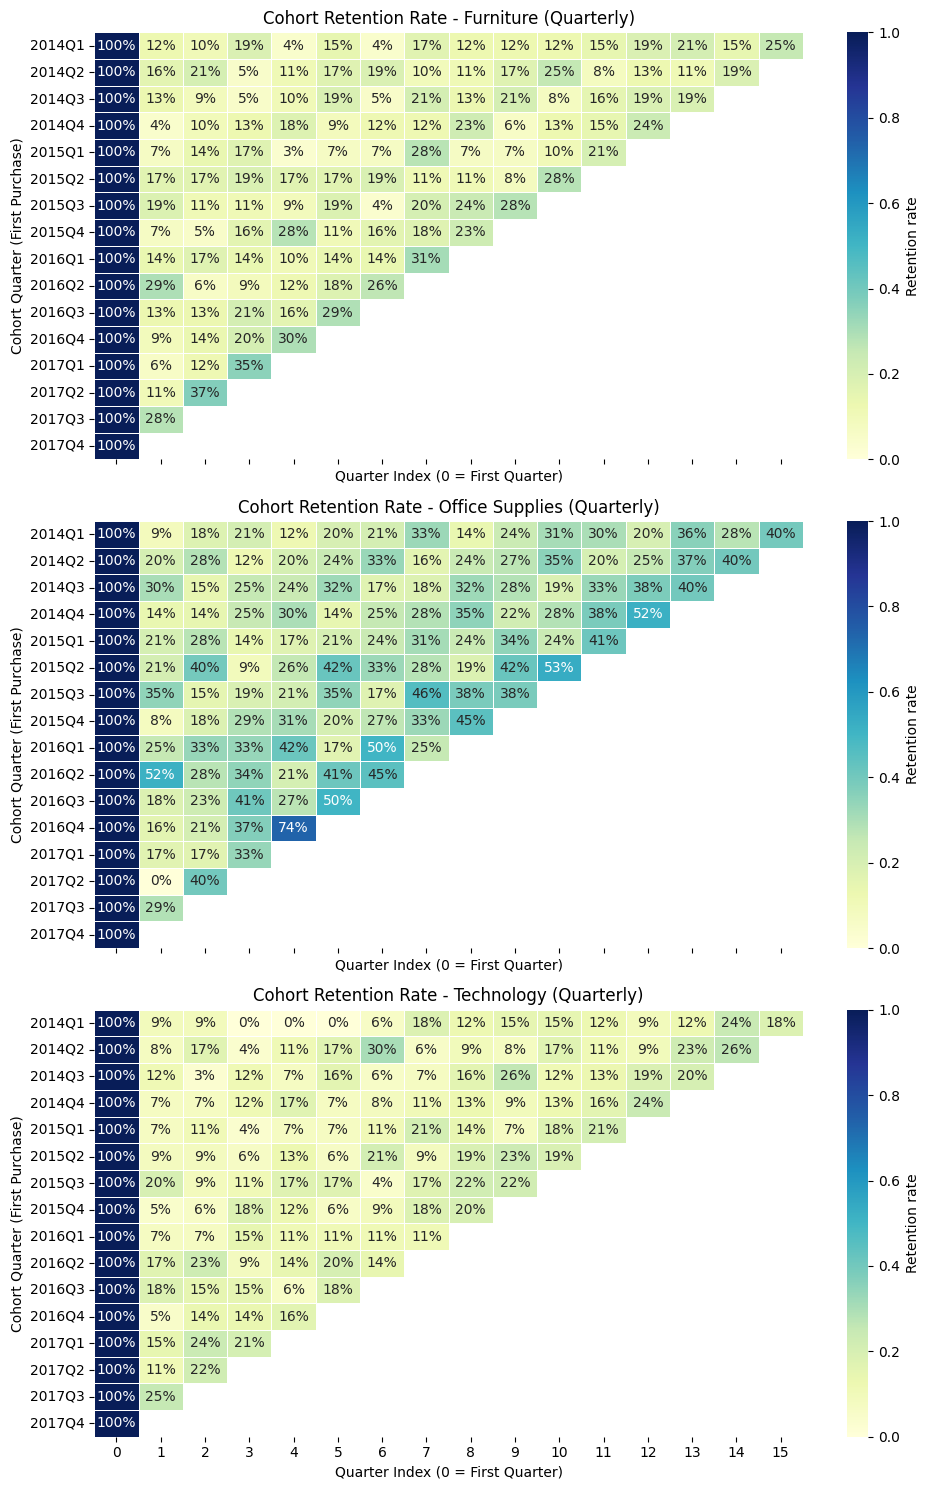

In [ ]:
# visualisasi heatmap retention per kategori dengan layout vertikal
categories = list(cohort_retention_categories_q.keys())
n_cat = len(categories)

fig, axes = plt.subplots(n_cat, 1, figsize=(10, 5*n_cat), sharex=True)

if n_cat == 1:
    axes = [axes]

for ax, cat in zip(axes, categories):
    matrix = cohort_retention_categories_q[cat]
    sns.heatmap(matrix,
                annot=True, fmt='.0%', cmap='YlGnBu',
                vmin=0, vmax=1, linewidths=.5, linecolor='white',
                cbar_kws={'label':'Retention rate'},
                mask=matrix.isna(),
                ax=ax)
    ax.set_title(f'Cohort Retention Rate - {cat} (Quarterly)')
    ax.set_xlabel('Quarter Index (0 = First Quarter)')
    ax.set_ylabel('Cohort Quarter (First Purchase)')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()

## Per Category

Furniture → Retensi sangat rendah (14–32%), pembelian jarang. Strategi: bundling, garansi, program repeat order.

Office Supplies → Retensi terbaik (40–70% hingga semester 6/7), kebutuhan rutin. Strategi: auto-reorder, cross/upselling, kontrak suplai.

Technology → Retensi awal rendah (14–31%), tapi stabil jangka panjang (30–36%). Strategi: after-sales, upgrade, membership.

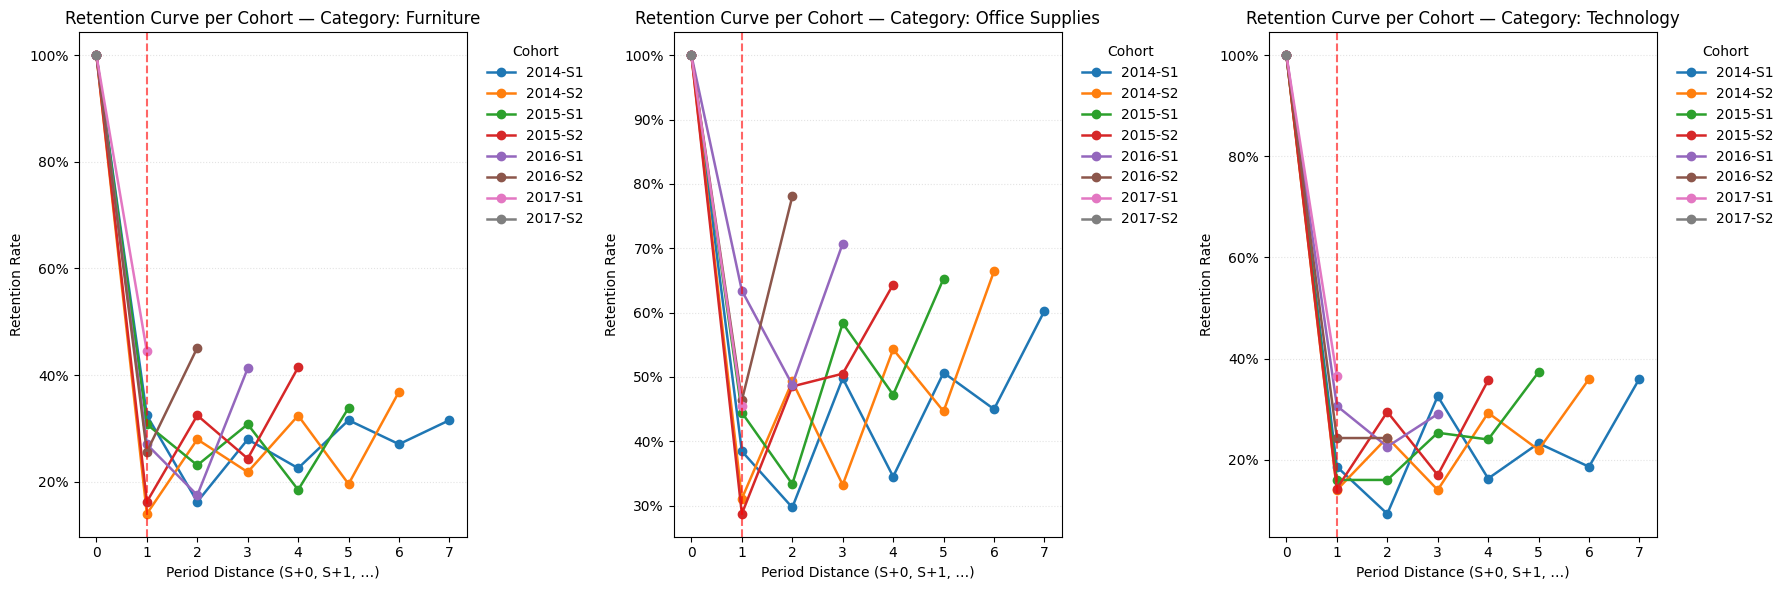

In [49]:
from matplotlib.ticker import PercentFormatter

# daftar kategori yang mau divisualisasi
categories = ["Furniture", "Office Supplies", "Technology"]

fig, axes = plt.subplots(1, len(categories), figsize=(6*len(categories), 6), sharex=True)

for ax, cat in zip(axes, categories):
    mat = cohort_retention_categories[cat].copy()
    long_df = (
        mat.reset_index()
           .melt(id_vars='CohortSemLabel', var_name='period_distance', value_name='retention')
           .dropna()
    )
    long_df['period_distance'] = long_df['period_distance'].astype(int)

    # plot garis retention per cohort
    for coh, sub in long_df.groupby('CohortSemLabel'):
        sub = sub.sort_values('period_distance')
        ax.plot(sub['period_distance'], sub['retention'], marker='o', linewidth=1.8, label=coh)

    # garis penanda churn awal
    ax.axvline(x=1, color='red', linestyle='--', alpha=0.6)

    ax.set_title(f"Retention Curve per Cohort — Category: {cat}")
    ax.set_xlabel("Period Distance (S+0, S+1, …)")
    ax.set_ylabel("Retention Rate")
    ax.yaxis.set_major_formatter(PercentFormatter(1.0))
    ax.set_xticks(np.arange(long_df['period_distance'].min(), long_df['period_distance'].max()+1))
    ax.grid(axis='y', linestyle=':', alpha=0.35)

    # legend di luar biar tidak menutupi chart
    ax.legend(title='Cohort', bbox_to_anchor=(1.02, 1), loc='upper left', frameon=False)

plt.tight_layout()
plt.show()

- Office Supplies → kategori dengan retensi terbaik dan pelanggan paling loyal.

- Furniture → kategori dengan retensi terendah, perlu strategi khusus untuk mendorong repeat order.

- Technology → retensi awal lemah, tapi masih ada peluang dari segmen pelanggan loyal jangka panjang.

Office Supplies memiliki retensi tertinggi dan pelanggan yang loyal, sementara Furniture paling rendah karena jarang ada pembelian ulang. Technology rendah di awal namun ada segmen kecil yang bertahan lama. Dengan demikian, Office Supplies paling stabil, sedangkan Furniture dan Technology perlu strategi untuk meningkatkan retensi awal.

## INSIGHT / ANALYSIS

1. Retensi Pelanggan per Kategori Produk

- **Furniture**

  Retensi pelanggan rendah, hanya 14–32% yang kembali di semester kedua. Pola pembelian jarang/rugi, naik tipis di semester 3–4 tapi tetap rendah (<40%). → Strategi: program bundling, garansi tambahan, after-sales untuk mendorong repeat order.

- **Office Supplies**

  Retensi terbaik dibanding kategori lain, banyak cohort bertahan 40–70% hingga semester ke-6/7. Produk kebutuhan rutin sehingga loyalitas pelanggan kuat. → Strategi: auto-reorder, cross/upselling, kontrak langganan.

- **Technology**

  Retensi awal lemah (14–31%), tapi ada kelompok loyal yang bertahan stabil 30–36% di semester 6/7. → Strategi: after-sales service, program upgrade, trade-in, membership khusus.


2. Perbedaan Retensi Antar Segmen Pelanggan

- **Home Office**
  Retensi tinggi sejak awal (>50% kembali di semester 2). Stabil di tahun berikutnya, dipengaruhi tren WFH. → Strategi: cross-selling, bundling paket kerja rumah, program loyalitas.

- **Corporate**
  Retensi paling kuat, bahkan bisa >70% hingga semester 3–4. Pembelian berbasis kontrak membuat loyalitas tinggi. → Strategi: layanan premium, kontrak jangka panjang, program eksklusif korporat.

- **Consumer**
  Retensi fluktuatif. Menurun di semester awal, tetapi meningkat signifikan di tahun ke-3 (efek musiman: liburan, diskon, tahun baru). → Strategi: kampanye musiman, flash sale, program poin loyalitas.

3. Perbandingan Retensi × Sales × Profit

**Furniture**

- Retensi: paling rendah.

- Sales: besar tapi jarang (harga tinggi, frekuensi rendah).

- Profit: margin tinggi, tetapi kurang stabil karena repeat order rendah.
→ Fokus ke customer retention dengan strategi after-sales & bundling.

**Office Supplies**

- Retensi: paling stabil & tinggi.

- Sales: konsisten, volume besar karena pembelian rutin.

- Profit: akumulasi tinggi meski margin per produk relatif kecil.
→ Fokus ke volume growth dengan auto-reorder & upselling.

**Technology**

- Retensi: awal lemah, tapi ada segmen loyal.

- Sales: tinggi saat product launch / upgrade cycle.

- Profit: signifikan di periode upgrade, tetapi tidak stabil.
→ Fokus ke customer lifecycle: after-sales, trade-in, membership.


Jadi, retensi paling kuat ada di segmen Corporate & kategori Office Supplies, sedangkan yang paling lemah ada di kategori Furniture & segmen Consumer. Strategi bisnis ke depan perlu dibedakan per kategori & segmen:

- Corporate → kontrak & layanan eksklusif.

- Home Office → bundling + cross-sell.

- Consumer → kampanye musiman & loyalitas poin.

- Furniture → repeat order dengan garansi & after-sales.

- Office Supplies → auto-reorder & upselling.

- Technology → upgrade & trade-in.

# Insight Akhir
**Catatan**
* Furniture: Retensi naik di tahun ke-3, terutama semester 2–3, dipengaruhi pembelian musiman & diskon akhir tahun.
* Office Supplies: Retensi konsisten sejak tahun ke-2, didorong kebutuhan rutin sekolah dan kantor.
* Technology: Lonjakan di tahun ke-3 semester 2, karena peluncuran produk baru & promo besar.
* Home Office: Retensi tinggi sejak awal dan stabil, menunjukkan pembelian berulang untuk kebutuhan kerja di rumah.

* Corporate: Paling konsisten, naik kuat sejak tahun ke-2 berkat pola belanja kontrak & rutin.

* Consumer: Lonjakan tajam di tahun ke-3 akhir, dipengaruhi momen liburan & diskon besar.

**Strategi:**

* Momentum Musiman: Optimalkan promo akhir tahun & event global untuk Furniture & Technology.

* Siklus Anggaran & Sekolah: Fokus pada paket back-to-school & anggaran kantor di Office Supplies.

* Kebutuhan Rutin: Dorong repeat order Home Office dengan paket langganan & promo berkala.

* Loyalitas Korporasi: Perkuat Corporate dengan kontrak jangka panjang & layanan premium.

* Konsumen Musiman: Maksimalkan musim liburan dengan diskon, bundling keluarga & loyalty rewards untuk Consumer.